# Homework 1 Solutions

Probabilistic Machine Learning -- Spring 2025, UniTS

## Exercise 1: KL Divergence Between Two Gaussian Distributions

Given two multivariate Gaussian distributions:

$$p(x) = \mathcal{N}(x \mid \mu, \Sigma)$$

$$q(x) = \mathcal{N}(x \mid m, L)$$

where:
- $\mu$ and $\Sigma$ are the mean vector and covariance matrix of $p(x)$
- $m$ and $L$ are the mean vector and covariance matrix of $q(x)$

### 1. Derive the closed-form expression for $D_{KL}(p \parallel q)$ starting from the definition.

Starting from the definition of KL divergence:

$$D_{KL}(p \parallel q) = \int p(x) \log \frac{p(x)}{q(x)} dx$$

For multivariate Gaussian distributions, we have:

$$p(x) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$

$$q(x) = \frac{1}{(2\pi)^{d/2}|L|^{1/2}} \exp\left(-\frac{1}{2}(x-m)^TL^{-1}(x-m)\right)$$

where $d$ is the dimension of the random variable $x$.

Substituting these into the KL divergence formula:

$$D_{KL}(p \parallel q) = \int p(x) \log \frac{p(x)}{q(x)} dx$$

$$= \int p(x) \log \left[ \frac{\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)}{\frac{1}{(2\pi)^{d/2}|L|^{1/2}} \exp\left(-\frac{1}{2}(x-m)^TL^{-1}(x-m)\right)} \right] dx$$

$$= \int p(x) \log \left[ \frac{|L|^{1/2}}{|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) + \frac{1}{2}(x-m)^TL^{-1}(x-m)\right) \right] dx$$

$$= \int p(x) \left[ \frac{1}{2}\log\frac{|L|}{|\Sigma|} -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) + \frac{1}{2}(x-m)^TL^{-1}(x-m) \right] dx$$

Let's compute each term separately:

1. $\frac{1}{2}\log\frac{|L|}{|\Sigma|} \int p(x) dx = \frac{1}{2}\log\frac{|L|}{|\Sigma|}$ (since $\int p(x) dx = 1$)

2. $-\frac{1}{2} \int p(x) (x-\mu)^T\Sigma^{-1}(x-\mu) dx = -\frac{1}{2} \mathbb{E}_{p(x)}[(x-\mu)^T\Sigma^{-1}(x-\mu)] = -\frac{1}{2} \text{tr}(\Sigma^{-1}\Sigma) = -\frac{d}{2}$

3. For the third term, we need to expand $(x-m)^TL^{-1}(x-m)$:
   
   $(x-m)^TL^{-1}(x-m) = (x-\mu+\mu-m)^TL^{-1}(x-\mu+\mu-m)$
   
   $= (x-\mu)^TL^{-1}(x-\mu) + 2(x-\mu)^TL^{-1}(\mu-m) + (\mu-m)^TL^{-1}(\mu-m)$

   Taking the expectation with respect to $p(x)$:
   
   $\mathbb{E}_{p(x)}[(x-\mu)^TL^{-1}(x-\mu)] = \text{tr}(L^{-1}\Sigma)$
   
   $\mathbb{E}_{p(x)}[2(x-\mu)^TL^{-1}(\mu-m)] = 0$ (since $\mathbb{E}_{p(x)}[x-\mu] = 0$)
   
   $\mathbb{E}_{p(x)}[(\mu-m)^TL^{-1}(\mu-m)] = (\mu-m)^TL^{-1}(\mu-m)$

Combining all terms:

$$D_{KL}(p \parallel q) = \frac{1}{2}\log\frac{|L|}{|\Sigma|} - \frac{d}{2} + \frac{1}{2}\text{tr}(L^{-1}\Sigma) + \frac{1}{2}(\mu-m)^TL^{-1}(\mu-m)$$

$$= \frac{1}{2}\left[ \log\frac{|L|}{|\Sigma|} - d + \text{tr}(L^{-1}\Sigma) + (\mu-m)^TL^{-1}(\mu-m) \right]$$

This is the closed-form expression for the KL divergence between two multivariate Gaussian distributions.

### 2. Implement a Python function that computes the closed-form expression of the KL divergence for two-dimensional Gaussian distributions using only numpy functions.

In [1]:
import numpy as np

def kl_divergence_gaussian(mu_p, sigma_p, mu_q, sigma_q):
    """
    Compute the KL divergence between two multivariate Gaussian distributions p and q.

    Parameters:
    mu_p (numpy.ndarray): Mean vector of distribution p
    sigma_p (numpy.ndarray): Covariance matrix of distribution p
    mu_q (numpy.ndarray): Mean vector of distribution q
    sigma_q (numpy.ndarray): Covariance matrix of distribution q

    Returns:
    float: KL divergence D_KL(p||q)
    """
    # Ensure inputs are numpy arrays
    mu_p = np.asarray(mu_p)
    mu_q = np.asarray(mu_q)
    sigma_p = np.asarray(sigma_p)
    sigma_q = np.asarray(sigma_q)

    # Get dimension
    d = len(mu_p)

    # Calculate log determinant ratio
    log_det_ratio = np.log(np.linalg.det(sigma_q) / np.linalg.det(sigma_p))

    # Calculate trace term
    sigma_q_inv = np.linalg.inv(sigma_q)
    trace_term = np.trace(np.matmul(sigma_q_inv, sigma_p))

    # Calculate mean difference term
    mean_diff = mu_p - mu_q
    mean_term = np.matmul(np.matmul(mean_diff.T, sigma_q_inv), mean_diff)

    # Combine all terms
    kl = 0.5 * (log_det_ratio - d + trace_term + mean_term)

    return kl

### 3. Test the function on the following concrete example where both p(x) and q(x) are two-dimensional Gaussians.

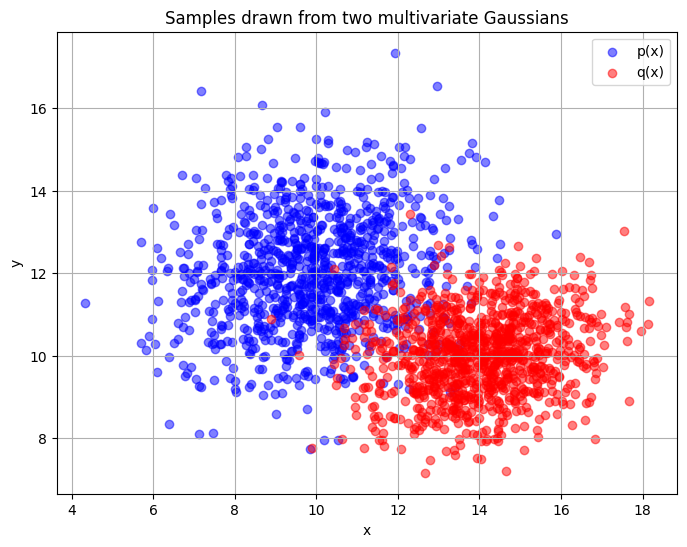

KL divergence D_KL(p||q) = 7.742145
KL divergence D_KL(q||p) = 4.655396


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mu_p = np.array([10, 12])
sigma_p = np.array([[3, 0.5], [0.5, 2]])
mu_q = np.array([14, 10])
sigma_q = np.array([[2, 0.3], [0.3, 1]])

data_points = 1000

p_samples = np.random.multivariate_normal(mu_p, sigma_p, data_points)
q_samples = np.random.multivariate_normal(mu_q, sigma_q, data_points)

# p, q samples visualization
plt.figure(figsize=(8, 6))
plt.scatter(p_samples[:, 0], p_samples[:, 1], alpha=0.5, label='p(x)', color='blue')
plt.scatter(q_samples[:, 0], q_samples[:, 1], alpha=0.5, label='q(x)', color='red')
plt.title('Samples drawn from two multivariate Gaussians')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Calculate KL divergence using our function
kl_div = kl_divergence_gaussian(mu_p, sigma_p, mu_q, sigma_q)
print(f"KL divergence D_KL(p||q) = {kl_div:.6f}")

# Also calculate the reverse KL divergence to show asymmetry
kl_div_reverse = kl_divergence_gaussian(mu_q, sigma_q, mu_p, sigma_p)
print(f"KL divergence D_KL(q||p) = {kl_div_reverse:.6f}")

### 4. Implement another Python function which calculates an approximation of $D_{KL}(p \parallel q)$ from samples of p and q. Compare the results.

In [3]:
def kl_divergence_from_samples(p_samples, q_samples, bins=20):
    """
    Approximate KL divergence from samples using histogram binning.

    Parameters:
    p_samples (numpy.ndarray): Samples from distribution p
    q_samples (numpy.ndarray): Samples from distribution q
    bins (int): Number of bins for histogram

    Returns:
    float: Approximated KL divergence D_KL(p||q)
    """
    # Determine the range for histograms
    min_x = min(np.min(p_samples[:, 0]), np.min(q_samples[:, 0]))
    max_x = max(np.max(p_samples[:, 0]), np.max(q_samples[:, 0]))
    min_y = min(np.min(p_samples[:, 1]), np.min(q_samples[:, 1]))
    max_y = max(np.max(p_samples[:, 1]), np.max(q_samples[:, 1]))

    # Create 2D histograms
    range_xy = [[min_x, max_x], [min_y, max_y]]
    p_hist, x_edges, y_edges = np.histogram2d(p_samples[:, 0], p_samples[:, 1], bins=bins, range=range_xy, density=True)
    q_hist, _, _ = np.histogram2d(q_samples[:, 0], q_samples[:, 1], bins=bins, range=range_xy, density=True)

    # Add small epsilon to avoid division by zero or log(0)
    epsilon = 1e-10
    p_hist = p_hist + epsilon
    q_hist = q_hist + epsilon

    # Calculate KL divergence
    kl_div = np.sum(p_hist * np.log(p_hist / q_hist)) * ((max_x - min_x) / bins) * ((max_y - min_y) / bins)

    return kl_div

# Calculate KL divergence from samples
kl_div_samples = kl_divergence_from_samples(p_samples, q_samples, bins=30)
print(f"KL divergence from samples D_KL(p||q) ≈ {kl_div_samples:.6f}")

# Compare with analytical result
print(f"Analytical KL divergence D_KL(p||q) = {kl_div:.6f}")
print(f"Difference: {abs(kl_div - kl_div_samples):.6f}")

KL divergence from samples D_KL(p||q) ≈ 16.873554
Analytical KL divergence D_KL(p||q) = 7.742145
Difference: 9.131409


## Exercise 2: Entropy of nonsingular linear transformations

Consider a vector $x$ of continuous variables with distribution $p(x)$ and corresponding entropy $H[x]$. Suppose that we make a nonsingular linear transformation of $x$ to obtain a new variable $y = Ax$. Show that the corresponding entropy is given by

$$H[y] = H[x] + \ln |A|$$

where $|A|$ denotes the determinant of $A$.

### Solution:

Let's start with the definition of entropy for a continuous random variable $x$ with probability density function $p(x)$:

$$H[x] = -\int p(x) \ln p(x) dx$$

Now, we want to find the entropy of $y = Ax$, where $A$ is a nonsingular (invertible) matrix.

First, we need to find the probability density function of $y$, which we'll denote as $p_y(y)$. We can use the change of variables formula from probability theory.

Since $y = Ax$, we have $x = A^{-1}y$. The Jacobian of this transformation is $J = |\frac{\partial x}{\partial y}| = |A^{-1}| = \frac{1}{|A|}$, where $|A|$ is the determinant of $A$.

By the change of variables formula, we have:

$$p_y(y) = p_x(A^{-1}y) \cdot |A^{-1}| = p_x(A^{-1}y) \cdot \frac{1}{|A|}$$

Now, let's compute the entropy of $y$:

$$H[y] = -\int p_y(y) \ln p_y(y) dy$$

Substituting the expression for $p_y(y)$:

$$H[y] = -\int p_x(A^{-1}y) \cdot \frac{1}{|A|} \ln \left( p_x(A^{-1}y) \cdot \frac{1}{|A|} \right) dy$$

Using the properties of logarithms:

$$H[y] = -\int p_x(A^{-1}y) \cdot \frac{1}{|A|} \left[ \ln p_x(A^{-1}y) + \ln \frac{1}{|A|} \right] dy$$

$$H[y] = -\int p_x(A^{-1}y) \cdot \frac{1}{|A|} \ln p_x(A^{-1}y) dy - \int p_x(A^{-1}y) \cdot \frac{1}{|A|} \ln \frac{1}{|A|} dy$$

Let's make a change of variables in the first integral: $u = A^{-1}y$, which implies $y = Au$ and $dy = |A| du$. Substituting:

$$H[y] = -\int p_x(u) \cdot \frac{1}{|A|} \ln p_x(u) |A| du - \int p_x(A^{-1}y) \cdot \frac{1}{|A|} \ln \frac{1}{|A|} dy$$

$$H[y] = -\int p_x(u) \ln p_x(u) du - \ln \frac{1}{|A|} \int p_x(A^{-1}y) \cdot \frac{1}{|A|} dy$$

The first term is just $H[x]$. For the second term, we can again make the change of variables $u = A^{-1}y$, which gives:

$$H[y] = H[x] - \ln \frac{1}{|A|} \int p_x(u) du$$

Since $p_x(u)$ is a probability density function, $\int p_x(u) du = 1$. Therefore:

$$H[y] = H[x] - \ln \frac{1}{|A|} = H[x] + \ln |A|$$

This proves the desired result: $H[y] = H[x] + \ln |A|$.

## Exercise 3: A good reason to go to university

You enrolled to a small tennis tournament organized by your university, that has only other three participants: let's call them $A$, $B$ and $C$. Your first match will be against $A$, and it's scheduled after the match between $A$ and $B$ and the match between $B$ and $C$.

Assuming the result of a match $M \in \{0, 1\}$ between two players $X$ and $Y$ ($M = 1$ means $X$ won, $M = 0$ means $Y$ won) is described by the following model:

$$M \sim Bern(p)$$

where $p = f(2(S_x - S_y))$ with $f(k) = \frac{1}{1+e^{-k}}$ and

$$S_i \sim \mathcal{N}(0, 1)$$

is the "latent" skill of player $i$ (always the same for every match that player $i$ plays)

### 1. Show a bayesian network describing the relationship between all the involved random variables.

The Bayesian network for this tennis tournament scenario involves the following random variables:
- $S_A$, $S_B$, $S_C$, $S_{You}$: The latent skills of players A, B, C, and You
- $M_{AB}$: Result of match between A and B
- $M_{BC}$: Result of match between B and C
- $M_{AY}$: Result of match between A and You

The Bayesian network structure is as follows:

```
S_A    S_B    S_C    S_You
 |\     /|     /       |
 | \   / |    /        |
 |  \ /  |   /         |
 |   X   |  /          |
 |  / \  | /           |
 | /   \ |/            |
M_AB    M_BC          /
         \           /
          \         /
           \       /
            \     /
             \   /
              \ /
             M_AY
```

In this network:
- Each skill variable $S_i$ follows a standard normal distribution $\mathcal{N}(0, 1)$
- Match results depend on the skills of the two players involved
- $M_{AB}$ depends on $S_A$ and $S_B$
- $M_{BC}$ depends on $S_B$ and $S_C$
- $M_{AY}$ depends on $S_A$ and $S_{You}$

The conditional probability distributions are:
- $P(M_{AB} = 1 | S_A, S_B) = f(2(S_A - S_B))$
- $P(M_{BC} = 1 | S_B, S_C) = f(2(S_B - S_C))$
- $P(M_{AY} = 1 | S_A, S_{You}) = f(2(S_A - S_{You}))$

where $f(k) = \frac{1}{1+e^{-k}}$ is the logistic function.

### 2. Make a model in pyro describing the stochastic process.

In [13]:
#pip install torch


Cloning into 'pyro'...
remote: Enumerating objects: 48899, done.
remote: Counting objects: 100% (931/931), done.
remote: Compressing objects: 100% (483/483), done.
remote: Total 48899 (delta 719), reused 454 (delta 447), pack-reused 47968 (from 5)
Receiving objects: 100% (48899/48899), 98.43 MiB | 28.46 MiB/s, done.
Resolving deltas: 100% (34956/34956), done.


In [17]:
#!pip install git+https://github.com/pyro-ppl/pyro.git


  Cloning https://github.com/pyro-ppl/pyro.git to /tmp/pip-req-build-dtr7w_y9
  Running command git clone --filter=blob:none --quiet https://github.com/pyro-ppl/pyro.git /tmp/pip-req-build-dtr7w_y9
  Resolved https://github.com/pyro-ppl/pyro.git to commit 4b80fc7274113920f102eaad15bed6bbf156e9e8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyro-ppl: filename=pyro_ppl-1.9.1+4b80fc72-py3-none-any.whl size=761312 sha256=d0d63a94dba15e7d7f701199bf18a63a8b7d6e5cd55200bf7352b71230fcd625
  Stored in directory: /tmp/pip-ephem-wheel-cache-89bvv7w9/wheels/be/b5/ce/d19751fb881fbd19a318531411da841c36132d951929a38fa8
Successfully built pyro-ppl


In [5]:
import random
import numpy as np
import torch

def set_seed():
    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [1]:
import pyro
import pyro.distributions as dist
import torch

def tennis_tournament_model(observe_AB=None, observe_BC=None, observe_AY=None):
    # Sample skills for all players from standard normal distribution
    skill_A = pyro.sample("skill_A", dist.Normal(0, 1))
    skill_B = pyro.sample("skill_B", dist.Normal(0, 1))
    skill_C = pyro.sample("skill_C", dist.Normal(0, 1))
    skill_You = pyro.sample("skill_You", dist.Normal(0, 1))

    # Compute match probabilities using logistic function
    # P(A wins against B)
    p_AB = torch.sigmoid(2 * (skill_A - skill_B))
    # P(B wins against C)
    p_BC = torch.sigmoid(2 * (skill_B - skill_C))
    # P(A wins against You)
    p_AY = torch.sigmoid(2 * (skill_A - skill_You))

    # Sample match results
    match_AB = pyro.sample("match_AB", dist.Bernoulli(p_AB), obs=observe_AB)
    match_BC = pyro.sample("match_BC", dist.Bernoulli(p_BC), obs=observe_BC)
    match_AY = pyro.sample("match_AY", dist.Bernoulli(p_AY), obs=observe_AY)

    return {"match_AB": match_AB, "match_BC": match_BC, "match_AY": match_AY}

### 3. Estimate by simulation the probability of (you) winning against A, given that A won against B and B won against C. Use exactly 30000 samples and call set_seed() before sampling.

In [7]:
import pyro.infer as infer

# Set the seed for reproducibility
#set_seed()

# Define the observed match results
observe_AB = torch.tensor(1.0)  # A won against B
observe_BC = torch.tensor(1.0)  # B won against C

# Create a conditioned model
conditioned_model = pyro.condition(tennis_tournament_model, {"match_AB": observe_AB, "match_BC": observe_BC})

# Set up the importance sampler
num_samples = 30000
importance_sampler = infer.Importance(conditioned_model, num_samples=num_samples)

# Run the importance sampler
importance_samples = importance_sampler.run()

# Extract the samples for match_AY
match_AY_samples = importance_samples.marginal("match_AY").empirical["match_AY"]

# Calculate the probability of you winning against A (match_AY = 0)
# Access the underlying samples and calculate the mean
# Access the samples as a tensor and convert to float32
prob_you_win = 1 - torch.mean(match_AY_samples.enumerate_support().type(torch.float32)).item()

print(f"Probability of you winning against A: {prob_you_win:.4f}")

Probability of you winning against A: 0.4942


## Exercise 4: Bayesian Inference on Carrier Status for Hemophilia

Hemophilia is caused by a recessive gene located on the X-chromosome. If $X^*$ denotes an X-chromosome carrying the hemophilia gene, then:

- $X^*X^*$ represents a female with the disease.
- $X^*X$ represents a female without the disease but carrying the gene.
- $X^*Y$ represents a male with the disease.

Mary has:
- An affected brother ($X^*Y$),
- An unaffected mother ($XX$ or $X^*X$),
- An unaffected father ($XY$).

Since Mary's brother is affected, he must have inherited an $X^*$ from the mother, implying that the mother is a carrier ($X^*X$).

Let $\theta$ be an indicator variable where:
- $\theta = 1$ if Mary is a gene carrier ($X^*X$),
- $\theta = 0$ if Mary is not a carrier ($XX$).

Given the above information, before any additional observations, we assign the prior probability: $P(\theta = 1) = \frac{1}{2}$

Mary has two sons (not identical twins, with unaffected father), both of whom are not affected by hemophilia.

Let $y_i$ be an indicator variable where:
- $y_i = 1$ if the $i$-th son is affected,
- $y_i = 0$ if the $i$-th son is unaffected.

Since males inherit their X-chromosome from their mother, if Mary is a carrier ($\theta = 1$), each son has a 50% chance of being affected.

The probability of both sons being unaffected (we denote this event, i.e. $y_1 = 0$ AND $y_2 = 0$, with $y = 1$), given $\theta$, is:

$$P(y = 1 | \theta) = \begin{cases}
0.25, & \text{if } \theta = 1 \\
1, & \text{if } \theta = 0
\end{cases}$$

### 1. Calculate $P(y)$

To calculate $P(y)$, we use the law of total probability:

$$P(y) = P(y | \theta = 1) \cdot P(\theta = 1) + P(y | \theta = 0) \cdot P(\theta = 0)$$

Given:
- $P(y | \theta = 1) = 0.25$ (probability of both sons being unaffected if Mary is a carrier)
- $P(y | \theta = 0) = 1$ (probability of both sons being unaffected if Mary is not a carrier)
- $P(\theta = 1) = \frac{1}{2}$ (prior probability that Mary is a carrier)
- $P(\theta = 0) = \frac{1}{2}$ (prior probability that Mary is not a carrier)

Substituting these values:

$$P(y) = 0.25 \cdot \frac{1}{2} + 1 \cdot \frac{1}{2} = 0.125 + 0.5 = 0.625$$

Therefore, $P(y) = 0.625$.

### 2. Considering that both the sons are unaffected, calculate the posterior $P(\theta = 1|y)$

To calculate the posterior probability $P(\theta = 1|y)$, we use Bayes' theorem:

$$P(\theta = 1|y) = \frac{P(y|\theta = 1) \cdot P(\theta = 1)}{P(y)}$$

Given:
- $P(y|\theta = 1) = 0.25$ (probability of both sons being unaffected if Mary is a carrier)
- $P(\theta = 1) = \frac{1}{2}$ (prior probability that Mary is a carrier)
- $P(y) = 0.625$ (calculated in the previous question)

Substituting these values:

$$P(\theta = 1|y) = \frac{0.25 \cdot \frac{1}{2}}{0.625} = \frac{0.125}{0.625} = \frac{1}{5} = 0.2$$

Therefore, $P(\theta = 1|y) = 0.2$.

This means that after observing that both of Mary's sons are unaffected, the probability that Mary is a carrier of the hemophilia gene has decreased from the prior of 0.5 to a posterior of 0.2.

### 3. What is the probability that a third son is affected? Calculate the predictive distribution

To calculate the probability that a third son is affected, we need to find the predictive distribution $P(y_3 = 1 | y)$, where $y_3$ is the indicator for the third son and $y$ represents the observation that the first two sons are unaffected.

Using the law of total probability:

$$P(y_3 = 1 | y) = P(y_3 = 1 | \theta = 1, y) \cdot P(\theta = 1 | y) + P(y_3 = 1 | \theta = 0, y) \cdot P(\theta = 0 | y)$$

Given:
- $P(y_3 = 1 | \theta = 1, y) = P(y_3 = 1 | \theta = 1) = 0.5$ (if Mary is a carrier, each son has a 50% chance of being affected, regardless of the status of previous sons)
- $P(y_3 = 1 | \theta = 0, y) = P(y_3 = 1 | \theta = 0) = 0$ (if Mary is not a carrier, her sons cannot be affected)
- $P(\theta = 1 | y) = 0.2$ (calculated in the previous question)
- $P(\theta = 0 | y) = 1 - 0.2 = 0.8$

Substituting these values:

$$P(y_3 = 1 | y) = 0.5 \cdot 0.2 + 0 \cdot 0.8 = 0.1$$

Therefore, the probability that a third son is affected is $P(y_3 = 1 | y) = 0.1$ or 10%.

### 4. Suppose a third son is born and he is not affected, update the posterior by computing $P(\theta = 1|y, y_3 = 0)$

To update the posterior probability given that the third son is also unaffected, we use Bayes' theorem again:

$$P(\theta = 1|y, y_3 = 0) = \frac{P(y_3 = 0|\theta = 1, y) \cdot P(\theta = 1|y)}{P(y_3 = 0|y)}$$

Given:
- $P(y_3 = 0|\theta = 1, y) = P(y_3 = 0|\theta = 1) = 0.5$ (if Mary is a carrier, probability of an unaffected son is 0.5)
- $P(\theta = 1|y) = 0.2$ (posterior after observing two unaffected sons)

We need to calculate $P(y_3 = 0|y)$:

$$P(y_3 = 0|y) = P(y_3 = 0|\theta = 1, y) \cdot P(\theta = 1|y) + P(y_3 = 0|\theta = 0, y) \cdot P(\theta = 0|y)$$
$$P(y_3 = 0|y) = 0.5 \cdot 0.2 + 1 \cdot 0.8 = 0.1 + 0.8 = 0.9$$

Now, we can calculate the updated posterior:

$$P(\theta = 1|y, y_3 = 0) = \frac{0.5 \cdot 0.2}{0.9} = \frac{0.1}{0.9} = \frac{1}{9} \approx 0.111$$

Therefore, $P(\theta = 1|y, y_3 = 0) \approx 0.111$.

This means that after observing that all three of Mary's sons are unaffected, the probability that Mary is a carrier of the hemophilia gene has decreased further from 0.2 to approximately 0.111.

## Exercise 5: Hierarchical model in Pyro

In this problem, we consider a hierarchical model that represents the distribution of test scores across multiple schools. Our goal is to define a generative model that captures both global and school-specific variations in scores.

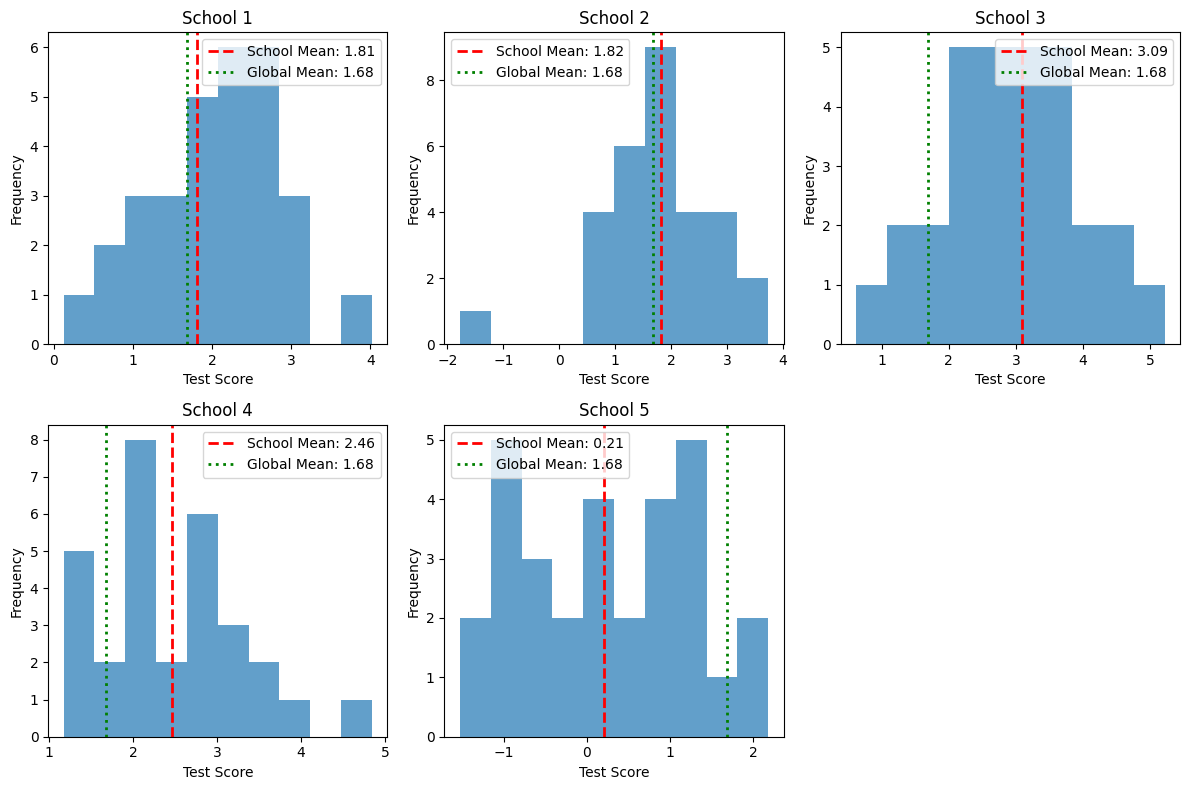

Global Mean: 1.68
School Means:
  School 1: 1.81
  School 2: 1.82
  School 3: 3.09
  School 4: 2.46
  School 5: 0.21


In [8]:
import pyro
import pyro.distributions as dist
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
pyro.set_rng_seed(42)

# Define the hierarchical model for test scores
def hierarchical_test_scores_model(num_schools=5, num_students=30):
    # Sample the global mean score across all schools
    mu_global = pyro.sample("mu_global", dist.Normal(0, 5))

    # Initialize lists to store school means and student scores
    school_means = []
    all_student_scores = []

    # For each school
    for i in range(num_schools):
        # Sample school-specific offset from global mean
        theta_i = pyro.sample(f"theta_{i}", dist.Normal(0, 1))

        # Compute school-specific mean
        mu_i = mu_global + theta_i
        school_means.append(mu_i.item())

        # Sample scores for students in this school
        student_scores = []
        for j in range(num_students):
            # Sample individual student score
            y_ij = pyro.sample(f"y_{i}_{j}", dist.Normal(mu_i, 1))
            student_scores.append(y_ij.item())

        all_student_scores.append(student_scores)

    return mu_global.item(), school_means, all_student_scores

# Run the model
global_mean, school_means, student_scores = hierarchical_test_scores_model()

# Plot histograms for each school
plt.figure(figsize=(12, 8))
for i, scores in enumerate(student_scores):
    plt.subplot(2, 3, i+1)
    plt.hist(scores, bins=10, alpha=0.7)
    plt.axvline(school_means[i], color='r', linestyle='dashed', linewidth=2, label=f'School Mean: {school_means[i]:.2f}')
    plt.axvline(global_mean, color='g', linestyle='dotted', linewidth=2, label=f'Global Mean: {global_mean:.2f}')
    plt.title(f'School {i+1}')
    plt.xlabel('Test Score')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Global Mean: {global_mean:.2f}")
print("School Means:")
for i, mean in enumerate(school_means):
    print(f"  School {i+1}: {mean:.2f}")

The hierarchical model implemented above represents the distribution of test scores across multiple schools. The model captures both global and school-specific variations in scores.

The generative process is as follows:

1. Sample the global mean score $\mu_{global} \sim \mathcal{N}(0, 5)$
2. For each school $i$:
   - Sample school-specific deviation $\theta_i \sim \mathcal{N}(0, 1)$
   - Compute school-specific mean $\mu_i = \mu_{global} + \theta_i$
   - For each student $j$ in school $i$:
     - Sample student score $y_{ij} \sim \mathcal{N}(\mu_i, 1)$

This hierarchical structure allows us to model the fact that students within the same school tend to have more similar scores (due to shared school-specific factors) while still capturing the overall distribution across all schools.